# **Aim of the notebook:**
To extract the sentences that have content regarding Human Relations. The sentences have to be in pairs (in any languages) to check if the translations are good or not. The evaluation scheme will be COMET. For now the focus is on English, Hindi and Odia which will be later propagated to other Indic Languages.

## Setup

In [1]:
%%capture
!git clone https://github.com/AI4Bharat/IndicTrans2.git

In [2]:
%%capture
%cd /content/IndicTrans2/huggingface_interface

In [3]:
%%capture
!python3 -m pip install nltk sacremoses pandas regex mock transformers>=4.33.2 mosestokenizer


In [4]:
!python3 -c "import nltk; nltk.download('punkt')"


[nltk_data] Downloading package punkt to /home/sofia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
!python3 -m pip install bitsandbytes scipy accelerate datasets


In [6]:
!python3 -m pip install sentencepiece


In [7]:
print("Installed not all the required packages")

print("Installed all the required packages")

!git clone https://github.com/VarunGumma/IndicTransToolkit
%cd IndicTransToolkit
!python3 -m pip install --editable ./
%cd ..

Installed not all the required packages
Installed all the required packages


fatal: destination path 'IndicTransToolkit' already exists and is not an empty directory.
/home/sofia/multilingual/IndicTransToolkit
Obtaining file:///home/sofia/multilingual/IndicTransToolkit
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/VarunGumma/indic_nlp_library to /tmp/pip-install-47a06uxj/indic-nlp-library-it2_5b1a1560c74d48099700d2552838010f
  Running command git clone --filter=blob:none --quiet https://github.com/VarunGumma/indic_nlp_library /tmp/pip-install-47a06uxj/indic-nlp-library-it2_5b1a1560c74d48099700d2552838010f
  Resolved https://github.com/VarunGumma/indic_nlp_library to commit 601521e05ed0ed8f2165ac317a47d186e25b6f0d
  Preparing metadata (setup.py) ... done
  Attempting uninstall: IndicTransToolkit
    Found existing installation: IndicTransToolkit 1.0.2
    Uninstalling IndicTransToolkit-1.0.2:
      Successfully uninstalled IndicTransToolkit-1.0.2
  DEPRECATION: Legacy editable install of IndicTransToolkit==1.0.2 from file:///home/sofia/mu

Restart after indic download

# Datasets involved:

In [3]:
import pandas as pd

In [ ]:
# # prompt: fetch data from https://data.statmt.org/wmt23/indic-mt/IndicNECorp1.0-20240218T213903Z-001.zip extract it

# !wget https://data.statmt.org/wmt23/indic-mt/IndicNECorp1.0-20240218T213903Z-001.zip
# !unzip IndicNECorp1.0-20240218T213903Z-001.zip


## Dataset-1: OdiEnCorp

In [ ]:
!curl --remote-name-all https://lindat.mff.cuni.cz/repository/xmlui/bitstream/handle/11234/1-2879{/OdiEnCorp_1.0.zip}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.7M  100 11.7M    0     0  2419k      0  0:00:04  0:00:04 --:--:-- 2738k


In [ ]:
!unzip OdiEnCorp_1.0.zip

Archive:  OdiEnCorp_1.0.zip
  inflating: OdiEnCorp_1.0/dev.final  
  inflating: OdiEnCorp_1.0/monolingual.final  
  inflating: OdiEnCorp_1.0/README.txt  
  inflating: OdiEnCorp_1.0/test.final  
  inflating: OdiEnCorp_1.0/train.final  


In [ ]:
# prompt: show 1st row from the above downloaded data

import pandas as pd

# Assuming the files are named 'en-hi.tsv' and 'en-or.tsv'
# df_en_hi = pd.read_csv('/content/IndicNECorp1.0/en-hi.tsv', sep='\t')
df_en_or_1 = pd.read_csv('OdiEnCorp_1.0/train.final', sep='\t', header=None, )



print("\nen-or:")
print(df_en_or_1)

# drop col 0 and rename cols
df_en_or_1 = df_en_or_1.drop(columns=[0])
df_en_or_1.columns = ['en', 'or']


print("\nen-or after dropping col 0:")
print(df_en_or_1.head())
print(df_en_or_1.shape)



en-or:
                0                                                  1  \
0         genesis  In the beginning God created the heaven and th...   
1         genesis  And the earth was without form, and void; and ...   
2         genesis  And God saw the light, that it was good: and G...   
3         genesis  And God called the light Day, and the darkness...   
4         genesis  And God said, Let there be a firmament in the ...   
...           ...                                                ...   
23786  revelation  I Jesus have sent mine angel to testify unto y...   
23787  revelation  And the Spirit and the bride say, Come. And le...   
23788  revelation  For I testify unto every man that heareth the ...   
23789  revelation  And if any man shall take away from the words ...   
23790  revelation  He which testifieth these things saith, Surely...   

                                                       2  
0           ଆରମ୍ଭରେ ପରମେଶ୍ବର ଆକାଶ ଓ ପୃଥିବୀକୁ ସୃଷ୍ଟି କଲେ।  
1      ପୃ

In [ ]:
# df_en_or.iloc[:, 2]

In [ ]:
# dictionary of string: list of strings
# reln : [senetence1, 2,...]  -> one lang  ---> make a common list = l1
# reln : [parallelSent1, 2, 3...] -> English ---> make a common list = l2
# above will be ground truths
# get translations of l2 and compare with l1
# check their Comet score

In [ ]:
# df_en_or_1.to_csv('en_or_1.csv', index=False, header=False)

df_en_or_1 = pd.read_csv('en_or_1.csv', header=None, names=['en', 'or'])

## Dataset-2: NLLB

In [ ]:
!wget https://object.pouta.csc.fi/OPUS-NLLB/v1/moses/en-or.txt.zip -O en-or.zip


--2024-09-05 15:44:19--  https://object.pouta.csc.fi/OPUS-NLLB/v1/moses/en-or.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 765155508 (730M) [application/zip]
Saving to: ‘en-or.txt.zip’

en-or.txt.zip       100%[===================>] 729.71M   999KB/s    in 10m 32s 

2024-09-05 15:54:53 (1.15 MB/s) - ‘en-or.txt.zip’ saved [765155508/765155508]

unzip:  cannot find or open /content/en-or.txt.zip, /content/en-or.txt.zip.zip or /content/en-or.txt.zip.ZIP.


In [ ]:
!unzip en-or.txt.zip

Archive:  en-or.txt.zip
  inflating: README                  
  inflating: LICENSE                 
  inflating: NLLB.en-or.en           
  inflating: NLLB.en-or.or           
  inflating: NLLB.en-or.scores       


In [ ]:

# take data from NLLB.en and .or and make a dataframe with 2 cols - english and odia. The files are txt types
# and each row or line will be a row in dataframe
# txt to dataframe
import pandas as pd

with open('NLLB.en-or.en') as f:
    df_en = f.readlines()

with open('NLLB.en-or.or') as f:
    df_or = f.readlines()




#make dataframe df_en_or_2 with 2 cols - english and odia from the above dataframes
df_en_or_2 = pd.DataFrame()
df_en_or_2['english'] = df_en
df_en_or_2['odia'] = df_or

print("\nen-or:")
print(df_en_or_2.head())





en-or:
                                             english  \
0                          (He said to the world).\n   
1  They do not serve your gods and they do not wo...   
2                        If they are of the Truth,\n   
3                                O, the believers.\n   
4    If you tell the truth [even if it hurts me]..\n   

                                                odia  
0                           ବିଶ୍ୱକେତୁ ପଚାରିଲା "କହ!\n  
1  ସେମାନେ ଆପଣଙ୍କ ଦେବଗଣର ସେବା କରନ୍ତି ନାହିଁ କି ଆପଣଙ...  
2   ଭିନ୍ନ ସ୍ୱର ଯଦି ସତ୍ୟ ହେଲା ତେବେ ଏହା ନିଶ୍ଚୟ ପଦାକୁ\n  
3                                   ହେ ବିଶ୍ୱାସର ଭଗ\n  
4                          ଚାହଁ ଯଦି ସତ୍ୟର ସ୍ଥାପନ ॥\n  


In [ ]:
df_en_or_2.shape


(13733205, 2)

In [ ]:
#rename cols
df_en_or_2.columns = ['en', 'or']

print("\nen-or after renaming cols:")
print(df_en_or_2.head())
print(df_en_or_2.shape)


en-or after renaming cols:
                                                  en  \
0                          (He said to the world).\n   
1  They do not serve your gods and they do not wo...   
2                        If they are of the Truth,\n   
3                                O, the believers.\n   
4    If you tell the truth [even if it hurts me]..\n   

                                                  or  
0                           ବିଶ୍ୱକେତୁ ପଚାରିଲା "କହ!\n  
1  ସେମାନେ ଆପଣଙ୍କ ଦେବଗଣର ସେବା କରନ୍ତି ନାହିଁ କି ଆପଣଙ...  
2   ଭିନ୍ନ ସ୍ୱର ଯଦି ସତ୍ୟ ହେଲା ତେବେ ଏହା ନିଶ୍ଚୟ ପଦାକୁ\n  
3                                   ହେ ବିଶ୍ୱାସର ଭଗ\n  
4                          ଚାହଁ ଯଦି ସତ୍ୟର ସ୍ଥାପନ ॥\n  
(13733205, 2)


In [ ]:
# df_en_or_2.to_csv('en_or_2.csv', index=False, header=False)

df_en_or_2 = pd.read_csv('en_or_2.csv', header=None, names=['en', 'or'])

FileNotFoundError: [Errno 2] No such file or directory: 'en_or_2.csv'

## Dataset-3: Samanantar
IndicTrans2 is trained on this

In [ ]:
# prompt: get data from https://object.pouta.csc.fi/OPUS-Samanantar/v0.2/moses/en-or.txt.zip and extract it
# and put the data in dataframe and show the dataframe
#
!wget https://object.pouta.csc.fi/OPUS-Samanantar/v0.2/moses/en-or.txt.zip  -O samanantar_en_or.zip


--2024-09-05 16:59:16--  https://object.pouta.csc.fi/OPUS-Samanantar/v0.2/moses/en-or.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72827211 (69M) [application/zip]
Saving to: ‘samanantar_en_or.zip’

samanantar_en_or.zi  21%[===>                ]  15.15M   346KB/s    eta 70s    ^C


In [ ]:
!unzip -o samanantar_en_or.zip


Archive:  samanantar_en_or.zip
  inflating: README                  
  inflating: LICENSE                 
  inflating: Samanantar.en-or.en     
  inflating: Samanantar.en-or.or     
  inflating: Samanantar.en-or.xml    


FileNotFoundError: [Errno 2] No such file or directory: '/content/en-or.txt'

In [ ]:
#read from samaanantar data
with open('Samanantar.en-or.en') as f:
    df_en = f.readlines()

with open('Samanantar.en-or.or') as f:
    df_or = f.readlines()

#make dataframe df_en_or_3 with 2 cols - english and odia from the above dataframes
df_en_or_3 = pd.DataFrame()
df_en_or_3['english'] = df_en
df_en_or_3['odia'] = df_or

print("\nen-or:")
print(df_en_or_3.head())
print(df_en_or_3.shape)


en-or:
                                             english  \
0  The Congress, however, has also not announced ...   
1                Modi said, hitting out at Naidu. \n   
2             The government cannot waive it off. \n   
3                     Then add two cups of water. \n   
4  Tension prevailed as locals and family members...   

                                                odia  
0  ଅଥଚ ବଡ଼ଚଣାର କଂଗ୍ରେସ ପ୍ରାର୍ଥୀ ଆଜି ପର୍ଯ୍ୟନ୍ତ ଘୋଷ...  
1        ମୋଦିଙ୍କୁ ଆକ୍ଷେପ କରି ଗଡକରି ଏହା କହିଛନ୍ତି । \n  
2        ସରକାର ଚାହିଲେ ବି ଏହାକୁ ଏଡ଼ାଇ ପାରିବେ ନାହିଁ। \n  
3        ତା’ପରେ ସେଥିରେ ଦୁଇ କପ୍‌ ଗରମ ପାଣି ଢାଳନ୍ତୁ। \n  
4  ମୃତକଙ୍କ ପରିବାରକୁ ସେସୁ ଓ ସମ୍ପୃକ୍ତ ଠିକା ସଂସ୍ଥା ପ...  
(998229, 2)


In [ ]:
# rename cols
df_en_or_3.columns = ['en', 'or']

print("\nen-or after renaming cols:")
print(df_en_or_3.head())
print(df_en_or_3.shape)


en-or after renaming cols:
                                                  en  \
0  The Congress, however, has also not announced ...   
1                Modi said, hitting out at Naidu. \n   
2             The government cannot waive it off. \n   
3                     Then add two cups of water. \n   
4  Tension prevailed as locals and family members...   

                                                  or  
0  ଅଥଚ ବଡ଼ଚଣାର କଂଗ୍ରେସ ପ୍ରାର୍ଥୀ ଆଜି ପର୍ଯ୍ୟନ୍ତ ଘୋଷ...  
1        ମୋଦିଙ୍କୁ ଆକ୍ଷେପ କରି ଗଡକରି ଏହା କହିଛନ୍ତି । \n  
2        ସରକାର ଚାହିଲେ ବି ଏହାକୁ ଏଡ଼ାଇ ପାରିବେ ନାହିଁ। \n  
3        ତା’ପରେ ସେଥିରେ ଦୁଇ କପ୍‌ ଗରମ ପାଣି ଢାଳନ୍ତୁ। \n  
4  ମୃତକଙ୍କ ପରିବାରକୁ ସେସୁ ଓ ସମ୍ପୃକ୍ତ ଠିକା ସଂସ୍ଥା ପ...  
(998229, 2)


In [ ]:
# df_en_or_3.to_csv('en_or_3.csv', index=False, header=False)
df_en_or_3 = pd.read_csv('en_or_3.csv', header=None, names=['en', 'or'])

## Dataset-4: Anuvaad


In [ ]:
!wget https://object.pouta.csc.fi/OPUS-Anuvaad/v1/moses/en-or.txt.zip -O anuvaad_en_or.zip

!unzip -o anuvaad_en_or.zip



--2024-09-05 17:01:07--  https://object.pouta.csc.fi/OPUS-Anuvaad/v1/moses/en-or.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9956068 (9.5M) [application/zip]
Saving to: ‘anuvaad_en_or.zip’

anuvaad_en_or.zip   100%[===================>]   9.49M  2.81MB/s    in 3.4s    

2024-09-05 17:01:11 (2.81 MB/s) - ‘anuvaad_en_or.zip’ saved [9956068/9956068]

Archive:  anuvaad_en_or.zip
  inflating: README                  
  inflating: LICENSE                 
  inflating: Anuvaad.en-or.en        
  inflating: Anuvaad.en-or.or        
  inflating: Anuvaad.en-or.xml       


In [ ]:
# read from anuvaad data
with open('Anuvaad.en-or.en') as f:
    df_en = f.readlines()

with open('Anuvaad.en-or.or') as f:
    df_or = f.readlines()

#make dataframe df_en_or_4 with 2 cols - english and odia from the above dataframes
df_en_or_4 = pd.DataFrame()
df_en_or_4['english'] = df_en
df_en_or_4['odia'] = df_or

print("\nen-or:")
print(df_en_or_4.head())
print(df_en_or_4.shape)


en-or:
                                             english  \
0  With this bright past, we are the people, who ...   
1         Capacity building with thrust on women. \n   
2  Normally, when a natural crisis strikes, it is...   
3  President Macron thanked Prime Minister Modi a...   
4  India has registered less than 30,000 daily ne...   

                                                odia  
0  ଏଭଳି ଉଜ୍ଜ୍ୱଳ ଅତୀତ ସହିତ ଆମେ ହେଉଛୁ ଆଗକୁ ଚାଲିଲାବା...  
1      ମହିଳାଙ୍କୁ ଗୁରୁତ୍ଵ ଦିଆଯାଇ ସାମର୍ଥ୍ୟ ନିର୍ମାଣ. \n  
2  ସାଧାରଣତଃ, ଯେତେବେଳେ କୌଣସି ପ୍ରାକୃତିକ ସଂକଟକ ଆସିଥା...  
3  53- ତାଙ୍କୁ ଓ ତାଙ୍କର ପ୍ରତିନିଧିକୁ ପ୍ରଧାନମନ୍ତ୍ରୀ ...  
4  ଗତ 11 ଦିନରେ ଭାରତରେ କ୍ରମାଗତ ଭାବରେ 30,000 ରୁ କମ ...  
(92311, 2)


In [ ]:
# rename cols
df_en_or_4.columns = ['en', 'or']

print("\nen-or after renaming cols:")
print(df_en_or_4.head())
print(df_en_or_4.shape)



en-or after renaming cols:
                                                  en  \
0  With this bright past, we are the people, who ...   
1         Capacity building with thrust on women. \n   
2  Normally, when a natural crisis strikes, it is...   
3  President Macron thanked Prime Minister Modi a...   
4  India has registered less than 30,000 daily ne...   

                                                  or  
0  ଏଭଳି ଉଜ୍ଜ୍ୱଳ ଅତୀତ ସହିତ ଆମେ ହେଉଛୁ ଆଗକୁ ଚାଲିଲାବା...  
1      ମହିଳାଙ୍କୁ ଗୁରୁତ୍ଵ ଦିଆଯାଇ ସାମର୍ଥ୍ୟ ନିର୍ମାଣ. \n  
2  ସାଧାରଣତଃ, ଯେତେବେଳେ କୌଣସି ପ୍ରାକୃତିକ ସଂକଟକ ଆସିଥା...  
3  53- ତାଙ୍କୁ ଓ ତାଙ୍କର ପ୍ରତିନିଧିକୁ ପ୍ରଧାନମନ୍ତ୍ରୀ ...  
4  ଗତ 11 ଦିନରେ ଭାରତରେ କ୍ରମାଗତ ଭାବରେ 30,000 ରୁ କମ ...  
(92311, 2)


In [ ]:
# df_en_or_4.to_csv('en_or_4.csv', index=False, header=False)

df_en_or_4 = pd.read_csv('en_or_4.csv', header=None, names=['en', 'or'])

## Dataset-5: PM India
IndicTrans2 is trained


In [ ]:
!wget https://object.pouta.csc.fi/OPUS-pmindia/v1/moses/en-or.txt.zip -O pmindia_en_or.zip

!unzip -o pmindia_en_or.zip

--2024-09-05 17:01:57--  https://object.pouta.csc.fi/OPUS-pmindia/v1/moses/en-or.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3717853 (3.5M) [application/zip]
Saving to: ‘pmindia_en_or.zip’

pmindia_en_or.zip   100%[===================>]   3.54M  1.45MB/s    in 2.4s    

2024-09-05 17:02:00 (1.45 MB/s) - ‘pmindia_en_or.zip’ saved [3717853/3717853]

Archive:  pmindia_en_or.zip
  inflating: README                  
  inflating: LICENSE                 
  inflating: pmindia.en-or.en        
  inflating: pmindia.en-or.or        
  inflating: pmindia.en-or.xml       


In [ ]:
# read from pmindia data
with open('pmindia.en-or.en') as f:
    df_en = f.readlines()

with open('pmindia.en-or.or') as f:

    df_or = f.readlines()

#make dataframe df_en_or_5 with 2 cols - english and odia from the above dataframes
df_en_or_5 = pd.DataFrame()
df_en_or_5['english'] = df_en
df_en_or_5['odia'] = df_or

print("\nen-or:")
print(df_en_or_5.head())
print(df_en_or_5.shape)



en-or:
                                             english  \
0  The Union Cabinet chaired by Prime Minister Sh...   
1  The rationalization of Autonomous Bodies under...   
2  The time frame for implementation is one year, \n   
3  Rashtriya Arogya Nidhi (RAN) was set up as a r...   
4  An advance is placed with the Medical Superint...   

                                                odia  
0  ପ୍ରଧାନମନ୍ତ୍ରୀ ଶ୍ରୀ ନରେନ୍ଦ୍ର ମୋଦୀଙ୍କ ଅଧ୍ୟକ୍ଷତାର...  
1  ଏହି ସଂସ୍ଥାଗୁଡ଼ିକରେ ଜାତୀୟ ଆରୋଗ୍ୟ ପାଣ୍ଠି (ଆରଏଏନ) ...  
2  ଏହାର କାର୍ଯ୍ୟପ୍ରଣାଳୀ ସ୍ୱାସ୍ଥ୍ୟ ଏବଂ ପରିବାର କଲ୍ୟା...  
3  ଜାତୀୟ ଆରୋଗ୍ୟ ପାଣ୍ଠିର ଗଠନ ଏକ ପଞ୍ଜିକୃତ ସୋସାଇଟି ର...  
4  ଅଗ୍ରୀମ ଅର୍ଥରାଶି ଏହି ହସପିଟାଲକୁ ଚିକିତ୍ସା ନିରୀକ୍ଷ...  
(38360, 2)


In [ ]:
# rename cols
df_en_or_5.columns = ['en', 'or']

print("\nen-or after renaming cols:")
print(df_en_or_5.head())
print(df_en_or_5.shape)




en-or after renaming cols:
                                                  en  \
0  The Union Cabinet chaired by Prime Minister Sh...   
1  The rationalization of Autonomous Bodies under...   
2  The time frame for implementation is one year, \n   
3  Rashtriya Arogya Nidhi (RAN) was set up as a r...   
4  An advance is placed with the Medical Superint...   

                                                  or  
0  ପ୍ରଧାନମନ୍ତ୍ରୀ ଶ୍ରୀ ନରେନ୍ଦ୍ର ମୋଦୀଙ୍କ ଅଧ୍ୟକ୍ଷତାର...  
1  ଏହି ସଂସ୍ଥାଗୁଡ଼ିକରେ ଜାତୀୟ ଆରୋଗ୍ୟ ପାଣ୍ଠି (ଆରଏଏନ) ...  
2  ଏହାର କାର୍ଯ୍ୟପ୍ରଣାଳୀ ସ୍ୱାସ୍ଥ୍ୟ ଏବଂ ପରିବାର କଲ୍ୟା...  
3  ଜାତୀୟ ଆରୋଗ୍ୟ ପାଣ୍ଠିର ଗଠନ ଏକ ପଞ୍ଜିକୃତ ସୋସାଇଟି ର...  
4  ଅଗ୍ରୀମ ଅର୍ଥରାଶି ଏହି ହସପିଟାଲକୁ ଚିକିତ୍ସା ନିରୀକ୍ଷ...  
(38360, 2)


In [40]:
# df_en_or_5.to_csv('en_or_5.csv', index=False, header=False)
df_en_or_5 = pd.read_csv('en_or_5.csv', header=None, names=['en', 'or'])

## Dataset-6: WikiMedia

In [ ]:
!wget https://object.pouta.csc.fi/OPUS-wikimedia/v20230407/moses/en-or.txt.zip -O wikimedia_en_or.zip

!unzip -o wikimedia_en_or.zip


--2024-09-05 17:02:32--  https://object.pouta.csc.fi/OPUS-wikimedia/v20230407/moses/en-or.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.19, 86.50.254.18
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3922007 (3.7M) [application/zip]
Saving to: ‘wikimedia_en_or.zip’

wikimedia_en_or.zip 100%[===================>]   3.74M   851KB/s    in 4.5s    

2024-09-05 17:02:38 (851 KB/s) - ‘wikimedia_en_or.zip’ saved [3922007/3922007]

Archive:  wikimedia_en_or.zip
  inflating: README                  
  inflating: LICENSE                 
  inflating: wikimedia.en-or.en      
  inflating: wikimedia.en-or.or      
  inflating: wikimedia.en-or.xml     


In [ ]:
# read from wikimedia data
with open('wikimedia.en-or.en') as f:
    df_en = f.readlines()

with open('wikimedia.en-or.or') as f:
    df_or = f.readlines()

#make dataframe df_en_or_6 with 2 cols - english and odia from the above dataframes

df_en_or_6 = pd.DataFrame()
df_en_or_6['english'] = df_en
df_en_or_6['odia'] = df_or

print("\nen-or:")
print(df_en_or_6.head())
print(df_en_or_6.shape)



en-or:
                                             english  \
0  Samaresh Routray is a Popular Oriya and Hindi ...   
1                                      Early life \n   
2                                            Cast \n   
3                              Filmography (Odia) \n   
4  Thukul (2012) Kriminal (2011) 143 I Love You (...   

                                                odia  
0  ସମରେଶ ରାଉତରାୟ ଜଣେ ଜଣାଶୁଣା ଓଡ଼ିଆ ଓ ହିନ୍ଦୀ ସିନେ ...  
1                                 ପ୍ରାରମ୍ଭିକ ଜୀବନ \n  
2                                     ସିନେମା ଜୀବନ \n  
3                           ଅଭିନୀତ ଓଡ଼ିଆ କଥାଚିତ୍ର \n  
4  ଥୁକୁଲ୍ (୨୦୧୨) କ୍ରିମିନାଲ୍ (୨୦୧୧) ୧୪୩ ଆଇ ଲଭ ୟୁ (...  
(27433, 2)


In [ ]:
# rename cols
df_en_or_6.columns = ['en', 'or']

print("\nen-or after renaming cols:")
print(df_en_or_6.head())
print(df_en_or_6.shape)



en-or after renaming cols:
                                                  en  \
0  Samaresh Routray is a Popular Oriya and Hindi ...   
1                                      Early life \n   
2                                            Cast \n   
3                              Filmography (Odia) \n   
4  Thukul (2012) Kriminal (2011) 143 I Love You (...   

                                                  or  
0  ସମରେଶ ରାଉତରାୟ ଜଣେ ଜଣାଶୁଣା ଓଡ଼ିଆ ଓ ହିନ୍ଦୀ ସିନେ ...  
1                                 ପ୍ରାରମ୍ଭିକ ଜୀବନ \n  
2                                     ସିନେମା ଜୀବନ \n  
3                           ଅଭିନୀତ ଓଡ଼ିଆ କଥାଚିତ୍ର \n  
4  ଥୁକୁଲ୍ (୨୦୧୨) କ୍ରିମିନାଲ୍ (୨୦୧୧) ୧୪୩ ଆଇ ଲଭ ୟୁ (...  
(27433, 2)


In [33]:
# df_en_or_6.to_csv('en_or_6.csv', index=False, header=False)
df_en_or_6 = pd.read_csv('en_or_6.csv', header=None, names=['en', 'or'])

# defining relations

In [ ]:
def contains_reln(sent, list_relations):
  # print(sent, list_relations[0])
  # for reln in list_relations:
  #       if reln in sent:
  #           # print(sent, reln)
  #           return True
  # return False
  # check if any of the relations in list_relations are present in the sentence sent. do check with lower case if lowercase is allowed
  return any(reln in sent for reln in list_relations)





In [ ]:


relations_odia = ['ବାପା',  # Father
                  'ପିତା', 'ମାତା', 'ବୋଉ'
'ନାନା',  # Nānā
    # 'ମା\'',  # Mother
    'ଭାଇ',  # Brother
    'ଭଉଣୀ',  # Sister
    'ପୁଅ',  # Son
    'ଝିଅ',  # Daughter
    'ଦିଦି',  # Didi
    'ଜେଜେମା',  # Jejemā
    'ଜେଜେବାପା',  # Jejebāpā
    'ନାତି',  # Nāti
    'ନାତୁଣୀ',  # Nātuṇī
    'ଅଣନାତି',  # Aṇanāti
    'ଅଣନାତୁଣୀ',  # Aṇanātuṇī
    'ପଣନାତି',  # Paṇanāti
    'ପଣନାତୁଣୀ',  # Paṇanātuṇī
    'ଶଳା',  # Śālā
    'ଶାଳୀ',  # Śālī
    'ଭାଉଜ',  # Bhāuja
    'ନଣନ୍ଦ',  # Nanannda
    'ଭିନେଇ',  # Bhinēi
    'ଦିଆର',  # Diāra
    # 'ଜା\'',  # Jā
    'ଭାଇବୋହୁ',  # Bhāibohu
    'ନଣନ୍ଦେଇ',  # Nanandei
   'ଦାଦା',  # Dādā
    'ଖୁଡ଼ି',  # Khudi
    'ବଡ଼ବାପା',  # Baḍabāpā
    'ବଡ଼ମା',  # Baḍamā
    'ମାମୁ',  # Māmu
    'ମାଇଁ',  # Māiṁ
   'ମାଉସୀ',
'ମଉସା',
    'ପିସା',  # Pisā
    'ପିସୀ',  # Pisī
    'ଝିଆରୀ',  # Jhīārī
    'ପୁତୁରା',  # Puturā
    'ଭଣଜା',  # Bhāṇajā
      # Bhāṇajī
      'ଜ୍ୱାଇଁ',  # Jwāiṁ
    'ଶାଶୁ',  # Śāśu
    'ଶ୍ୱଶୁର'  # Śāśurā
    'ବୋହୁ',  # Bohu
    'ସମୁଧି',  # Samudhi
    'ସମୁଧୁନୀ',  # Samudhuni
    'ଜେଜେଶାଶୁ',  # Jejeśāśu
    'ସ୍ୱାମୀ',  # Swāmī
    'ସ୍ତ୍ରୀ',  # Strī
    'ବୋଉଲା',  # Boula
    'ସଙ୍ଗାତ' ,
'ଭାଣିଜୀ',
'ଦେଢ଼ଶୁର',
'ଦେଢଶଶୁର  ','ଦେଢ଼ଶାସୁ ','ସଢ଼ୁ','ସାବତ', 'ଅଜା', 'ଆଈ']

In [ ]:
relations_english = ['father',  'mother', 'brother', 'sister', 'son',
                     'daughter', 'grandfather', 'grandmother', 'granddaughter', 'grandson',
                     'husband', 'wife', 'uncle', 'aunt', 'niece', 'nephew',
                    'fiancé', 'fiancée', 'daughter-in-law', 'son-in-law',
                     'sister-in-law', 'brother-in-law']

# Making the **Relations** dataset

In [ ]:
relations_dataset = []

for df_en_or in [df_en_or_1,  df_en_or_3, df_en_or_4, df_en_or_5, df_en_or_6]:
    print("DF: ", df_en_or.shape)
    # for each row of df_en_od, check if column 2 has any of relations_english or column 3 has any of relations_odia
    # if there exsist any such snetence then append them to new dataset_relations with both columns resp
    for index, row in df_en_or.iterrows():
        # print(row[2])
      #if index<5250:
        if index%100 ==0:
            print("index: ", index)
        if contains_reln(row['or'], relations_odia) or contains_reln(row['en'], relations_english):
            relations_dataset.append(row)


relations_dataset = pd.DataFrame(relations_dataset, )
relations_dataset.shape


Streaming output truncated to the last 5000 lines.
index:  656900
index:  657000
index:  657100
index:  657200
index:  657300
index:  657400
index:  657500
index:  657600
index:  657700
index:  657800
index:  657900
index:  658000
index:  658100
index:  658200
index:  658300
index:  658400
index:  658500
index:  658600
index:  658700
index:  658800
index:  658900
index:  659000
index:  659100
index:  659200
index:  659300
index:  659400
index:  659500
index:  659600
index:  659700
index:  659800
index:  659900
index:  660000
index:  660100
index:  660200
index:  660300
index:  660400
index:  660500
index:  660600
index:  660700
index:  660800
index:  660900
index:  661000
index:  661100
index:  661200
index:  661300
index:  661400
index:  661500
index:  661600
index:  661700
index:  661800
index:  661900
index:  662000
index:  662100
index:  662200
index:  662300
index:  662400
index:  662500
index:  662600
index:  662700
index:  662800
index:  662900
index:  663000
index:  663100
inde

(82449, 2)

In [ ]:
relations_dataset

,en,or
10,And the evening and the morning were the third...,ପୃଥିବୀ ତୃଣ ଓ ନିଜ ନିଜ ଜାତି ଅନୁସାରେ ଜୀବ ଉତ୍ପାଦକ ...
22,"And to every beast of the earth, and to every ...","ତେଣୁ ପରମେଶ୍ବର, ଆପଣା ପ୍ରତିମୂର୍ତ୍ତୀ ରେ ମନୁଷ୍ଯକୁ ..."
33,The name of the first is Pison: that is it whi...,ପ୍ରଥମ ନଦୀର ନାମ ପିଶାେନ୍ ଥିଲା। ତାହା ସମସ୍ତ ହବିଲା ...
41,"And Adam said, This is now bone of my bones, a...",ତା'ପରେ ସଦାପ୍ରଭୁ ପରମେଶ୍ବର ମନୁଷ୍ଯକୁ ଘାରେ ନିଦ୍ରା ...
42,Therefore shall a man leave his father and his...,ମନୁଷ୍ଯ ପିତା ମାତାଙ୍କୁ ଛାଡ଼ି ସ୍ତ୍ରୀ ସହିତ ଏକତ୍ରୀତ...
...,...,...
27344,Year Song Note 2017 Tujme Hi Mera Jahaan Lyric...,ବର୍ଷ ଗୀତ ଧ୍ୟାନ ଦିଅନ୍ତୁ ୨୦୧୭ ତୁଝମେ ହି ମେରା ଜାହା...
27401,Thanjai Selvi is a Tamil singer. She is popula...,ତଞ୍ଜାଇ ସେଲଭି ଜଣେ ଭାରତୀୟ-ତାମିଲ କଣ୍ଠଶିଳ୍ପୀ। ସେ ଲ...
27404,Thanjai Selvi has so far sung the following so...,ତଞ୍ଜାଇ ସେଲଭି ୨୦୧୦ ମସିହାରେ ତାମିଲ କଥାଚିତ୍ର ଜଗତରେ...
27410,CarryMinati Nagar in 2022 Personal information...,CarryMinati Nagar in 2022 Personal information...


In [ ]:
#download the data relations_dataset to a csv file with 2 cols - english and odia

# relations_dataset.to_csv('relations_dataset.csv', index=False, header=False)

relations_dataset = pd.read_csv('relations_dataset.csv', header=None, names=['en', 'or'])

In [ ]:
# prompt: make a dictionary with keys as relations from relations_odia and value is a list of strings from df_en_od's 2nd column. value will be there if the relation is present in the string in 2nd column. filtering the 2nd col as  per reln

# relation_dict = {}
# for relation in relations_odia:
  # relation_dict[relation] = []
  # for sentence in df_en_or.iloc[:, 2]:
  #   if relation in sentence:
      # relation_dict[relation].append(sentence)

# relation_dict


## Checking length for translation

In [41]:
# from all datasets, make dataframes with 2 columns each but by combining 2, 5, 7, 10, 14, 20 sentences from each dataset
# Eg: make dataset_len_2 by combining 2 sentences from each dataset
# Eg: make dataset_len_5 by combining 5 sentences from each dataset
# Eg: make dataset_len_7 by combining 7 sentences from each dataset
# Eg: make dataset_len_10 by combining 10 sentences from each dataset

# df_en_or_1, df_en_or_2, df_en_or_3, df_en_or_4, df_en_or_5, df_en_or_6


lengths = [2,  5, 7, 10, 14, 20]

for length in lengths:
    print("Length: ", length)
    df_en_or = pd.DataFrame()
    for df in [ df_en_or_5, df_en_or_6]:
        print("DF: ", df.shape)
        # concatenate length number of sentences into 1 row for each dataset to df_en_or. For eg: if length is 2, then all consecutive sentences from each dataset is to be clubbed into df_en_or_len_2
        for i in range(0, df.shape[0], length):
            # print(i)
            #use pandas.concat
            df_en_or = pd.concat([df_en_or, pd.DataFrame({'en': '. '.join(df['en'].iloc[i:i+length].apply(lambda x: x.strip()).tolist()), 'or': ' | '.join(df['or'].iloc[i:i+length].apply(lambda x: x.strip()).tolist())}, index=[0])], ignore_index=True)

            # df_en_or = df_en_or.append({'en': '. '.join(df['en'].iloc[i:i+length].tolist()), 'or': ' | '.join(df['or'].iloc[i:i+length].tolist())}, ignore_index=True) 
    print("DF: ", df_en_or.shape)
    df_en_or.to_csv(f'en_or_len{length}.csv', index=False, header=False)



Length:  2
DF:  (38360, 2)
DF:  (27433, 2)
DF:  (32897, 2)
Length:  5
DF:  (38360, 2)
DF:  (27433, 2)
DF:  (13159, 2)
Length:  7
DF:  (38360, 2)
DF:  (27433, 2)
DF:  (9399, 2)
Length:  10
DF:  (38360, 2)
DF:  (27433, 2)
DF:  (6580, 2)
Length:  14
DF:  (38360, 2)
DF:  (27433, 2)
DF:  (4700, 2)
Length:  20
DF:  (38360, 2)
DF:  (27433, 2)
DF:  (3290, 2)


In [10]:
# make df with 2 cols - english and odia from the above csv of lengths 2, 5, 7, 10, 14, 20
df_en_or_len2 = pd.read_csv('en_or_len2.csv', header=None, names=['en', 'or'])
df_en_or_len5 = pd.read_csv('en_or_len5.csv', header=None, names=['en', 'or'])
df_en_or_len7 = pd.read_csv('en_or_len7.csv', header=None, names=['en', 'or'])
df_en_or_len10 = pd.read_csv('en_or_len10.csv', header=None, names=['en', 'or'])
df_en_or_len14 = pd.read_csv('en_or_len14.csv', header=None, names=['en', 'or'])
df_en_or_len20 = pd.read_csv('en_or_len20.csv', header=None, names=['en', 'or'])


In [19]:
# for english tokens of bins 10, 20, 30 ...100 make dataframes with 2 cols - english and odia 
# from the above dataframes. If length of english sentence is <=10, then put the whole row in df_en_or_bin_10

# if length of english sentence is <=20, then put the whole row in df_en_or_bin_20
# if length of english sentence is <=30, then put the whole row in df_en_or_bin_30
# if length of english sentence is <=40, then put the whole row in df_en_or_bin_40
# if length of english sentence is <=50, then put the whole row in df_en_or_bin_50
# if length of english sentence is <=60, then put the whole row in df_en_or_bin_60
# if length of english sentence is <=70, then put the whole row in df_en_or_bin_70
# if length of english sentence is <=80, then put the whole row in df_en_or_bin_80
# if length of english sentence is <=90, then put the whole row in df_en_or_bin_90
# if length of english sentence is <=100, then put the whole row in df_en_or_bin_100
# if length of english sentence is >100, then put the whole row in df_en_or_bin_100_plus with a new column denoting the length of the english sentence

# bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bin_50 = pd.DataFrame()
bin_100 = pd.DataFrame()
bin_150 = pd.DataFrame()
bin_200 = pd.DataFrame()
bin_250 = pd.DataFrame()
bin_300 = pd.DataFrame()
bin_500 = pd.DataFrame()
bin_650 = pd.DataFrame()
bin_800 = pd.DataFrame()
bin_1000 = pd.DataFrame()
bin_1000_plus = pd.DataFrame()

bins = [bin_50, bin_100, bin_150, bin_200, bin_250, bin_300, bin_500, bin_650, bin_800, bin_1000]
bin_sizes = [50, 100, 150, 200, 250, 300, 500, 650, 800, 1000]

for df in [df_en_or_len2,    df_en_or_len20]:
        print("DF: ", df.shape, df.head(2))
        # for each row of df, check if length of english sentence is <= bin
        # if yes, then put the whole row in df_en_or_bin_bin
        # if no, then put the whole row in df_en_or_bin_100_plus with a new column denoting the length of the english sentence
        for index, row in df.iterrows():
            # print(row['en'])
            # print(row['or'])
            # print(len(row['en'].split()))
            # print(len(row['en'].split()), row['en'])
            # for i, bin in enumerate(bins):
            #     if len(row['en'].split()) <= (i+1)*50:

            for i, bin in enumerate(bins):
                print(i, len(row['en'].split()),  bin.shape)
                if len(row['en'].split()) <= bin_sizes[i]:
                    # print(i, len(row['en'].split()))
                    # print(row['en'])
                    # print(row['or'])
                    bins[i] = pd.concat([bins[i], pd.DataFrame({'en': row['en'], 'or': row['or']}, index=[0])], ignore_index=True)
                    # bin = bin.append({'en': row['en'], 'or': row['or']}, ignore_index=True)
                    break
                    
            if len(row['en'].split()) > bin_sizes[-1]:
                bin_100_plus = pd.concat([bin_100_plus, pd.DataFrame({'en': row['en'], 'or': row['or'], 'length': len(row['en'].split())}, index=[0])], ignore_index=True)
                # bin_100_plus = bin_100_plus.append({'en': row['en'], 'or': row['or'], 'length': len(row['en'].split())}, ignore_index=True)
# print("DF: ", bin_100_plus.shape, bin_100_plus.head(2))
# print("DF 10:", bin_10.shape, bin_10.head(2))
print(bins[0].shape, bins[1].shape, bins[2].shape, bins[3].shape, bins[4].shape, bins[5].shape, bins[6].shape, bins[7].shape, bins[8].shape, bins[9].shape, bin_1000_plus.shape)

DF:  (32896, 2)                                                   en  \
0  The Union Cabinet chaired by Prime Minister Sh...   
1  The time frame for implementation is one year,...   

                                                  or  
0  ପ୍ରଧାନମନ୍ତ୍ରୀ ଶ୍ରୀ ନରେନ୍ଦ୍ର ମୋଦୀଙ୍କ ଅଧ୍ୟକ୍ଷତାର...  
1  ଏହାର କାର୍ଯ୍ୟପ୍ରଣାଳୀ ସ୍ୱାସ୍ଥ୍ୟ ଏବଂ ପରିବାର କଲ୍ୟା...  
0 70 (0, 0)
1 70 (0, 0)
0 34 (0, 0)
0 41 (1, 2)
0 30 (2, 2)
0 25 (3, 2)
0 24 (4, 2)
0 36 (5, 2)
0 36 (6, 2)
0 65 (7, 2)
1 65 (1, 2)
0 17 (7, 2)
0 58 (8, 2)
1 58 (2, 2)
0 30 (8, 2)
0 29 (9, 2)
0 24 (10, 2)
0 35 (11, 2)
0 19 (12, 2)
0 54 (13, 2)
1 54 (3, 2)
0 49 (13, 2)
0 46 (14, 2)
0 42 (15, 2)
0 53 (16, 2)
1 53 (4, 2)
0 37 (16, 2)
0 39 (17, 2)
0 48 (18, 2)
0 27 (19, 2)
0 50 (20, 2)
0 29 (21, 2)
0 20 (22, 2)
0 48 (23, 2)
0 39 (24, 2)
0 39 (25, 2)
0 41 (26, 2)
0 30 (27, 2)
0 46 (28, 2)
0 50 (29, 2)
0 35 (30, 2)
0 36 (31, 2)
0 46 (32, 2)
0 30 (33, 2)
0 40 (34, 2)
0 38 (35, 2)
0 39 (36, 2)
0 44 (37, 2)
0 34 (38, 2)
0 48 (39, 2)
0 21 (40, 2)
0 43 

0 35 (120, 2)
0 29 (121, 2)
0 21 (122, 2)
0 45 (123, 2)
0 35 (124, 2)
0 35 (125, 2)
0 19 (126, 2)
0 28 (127, 2)
0 28 (128, 2)
0 26 (129, 2)
0 25 (130, 2)
0 33 (131, 2)
0 47 (132, 2)
0 29 (133, 2)
0 34 (134, 2)
0 33 (135, 2)
0 45 (136, 2)
0 28 (137, 2)
0 45 (138, 2)
0 181 (139, 2)
1 181 (11, 2)
2 181 (0, 0)
3 181 (0, 0)
0 41 (139, 2)
0 39 (140, 2)
0 53 (141, 2)
1 53 (11, 2)
0 46 (141, 2)
0 31 (142, 2)
0 42 (143, 2)
0 31 (144, 2)
0 37 (145, 2)
0 49 (146, 2)
0 43 (147, 2)
0 42 (148, 2)
0 46 (149, 2)
0 54 (150, 2)
1 54 (12, 2)
0 62 (150, 2)
1 62 (13, 2)
0 52 (150, 2)
1 52 (14, 2)
0 40 (150, 2)
0 44 (151, 2)
0 56 (152, 2)
1 56 (15, 2)
0 58 (152, 2)
1 58 (16, 2)
0 8 (152, 2)
0 55 (153, 2)
1 55 (17, 2)
0 32 (153, 2)
0 42 (154, 2)
0 30 (155, 2)
0 21 (156, 2)
0 37 (157, 2)
0 40 (158, 2)
0 30 (159, 2)
0 39 (160, 2)
0 33 (161, 2)
0 34 (162, 2)
0 36 (163, 2)
0 68 (164, 2)
1 68 (18, 2)
0 29 (164, 2)
0 37 (165, 2)
0 48 (166, 2)
0 61 (167, 2)
1 61 (19, 2)
0 23 (167, 2)
0 76 (168, 2)
1 76 (20, 2)
0 32

In [29]:
# print bin size and shape
for i, bin in enumerate(bins):
    print(bin_sizes[i], bin.shape)

print("1000 plus: ", bin_1000_plus.shape)

50 (24760, 2)
100 (6097, 2)
150 (1615, 2)
200 (373, 2)
250 (198, 2)
300 (422, 2)
500 (2049, 2)
650 (361, 2)
800 (160, 2)
1000 (109, 2)
1000 plus:  (0, 0)


Matplotlib is building the font cache; this may take a moment.


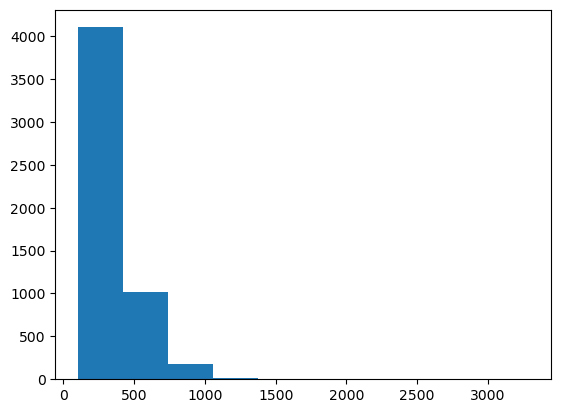

In [12]:
# # get the histogram of lengths from bin_100_plus
# import matplotlib.pyplot as plt
# # plt.hist(bin_100_plus['length'], bins=10)
# plt.show()

In [25]:
# save the bins dataframes to csv files
bins[0].to_csv('bin_50.csv', index=False, header=False)
bins[1].to_csv('bin_100.csv', index=False, header=False)
bins[2].to_csv('bin_150.csv', index=False, header=False)
bins[3].to_csv('bin_200.csv', index=False, header=False)
bins[4].to_csv('bin_250.csv', index=False, header=False)
bins[5].to_csv('bin_300.csv', index=False, header=False)
bins[6].to_csv('bin_500.csv', index=False, header=False)
bins[7].to_csv('bin_650.csv', index=False, header=False)
bins[8].to_csv('bin_800.csv', index=False, header=False)
bins[9].to_csv('bin_1000.csv', index=False, header=False)
bin_1000_plus.to_csv('bin_1000_plus.csv', index=False, header=False)


# Translate using models


## IndicTrans2

In [22]:
import torch
from transformers import AutoModelForSeq2SeqLM, BitsAndBytesConfig
# from IndicTransTokenizer import IndicProcessor, IndicTransTokenizer
from IndicTransToolkit import IndicProcessor
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

BATCH_SIZE = 16 # edited from 4
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
quantization = None
print(DEVICE)

cuda


In [23]:
def initialize_model_and_tokenizer(ckpt_dir, quantization):
    if quantization == "4-bit":
        qconfig = BitsAndBytesConfig(
            load_in_4bit=True,
            bnb_4bit_use_double_quant=True,
            bnb_4bit_compute_dtype=torch.bfloat16,
        )
    elif quantization == "8-bit":
        qconfig = BitsAndBytesConfig(
            load_in_8bit=True,
            bnb_8bit_use_double_quant=True,
            bnb_8bit_compute_dtype=torch.bfloat16,
        )
    else:
        qconfig = None

    tokenizer = AutoTokenizer.from_pretrained(ckpt_dir, trust_remote_code=True)
    model = AutoModelForSeq2SeqLM.from_pretrained(
        ckpt_dir,
        trust_remote_code=True,
        low_cpu_mem_usage=True,
        quantization_config=qconfig,
    )

    if qconfig == None:
        model = model.to(DEVICE)
        if DEVICE == "cuda":
            model.half()

    model.eval()

    return tokenizer, model


def batch_translate(input_sentences, src_lang, tgt_lang, model, tokenizer, ip):
    translations = []


    from tqdm import tqdm
    for i in tqdm(range(0, len(input_sentences), BATCH_SIZE)):

    # for i in range(0, len(input_sentences), BATCH_SIZE):
        batch = input_sentences[i : i + BATCH_SIZE]

        # Preprocess the batch and extract entity mappings
        batch = ip.preprocess_batch(batch, src_lang=src_lang, tgt_lang=tgt_lang)

        # Tokenize the batch and generate input encodings
        inputs = tokenizer(
            batch,
            truncation=True,
            padding="longest",
            return_tensors="pt",
            return_attention_mask=True,
        ).to(DEVICE)

        # Generate translations using the model
        with torch.no_grad():
            generated_tokens = model.generate(
                **inputs,
                use_cache=True,
                min_length=0,
                max_length=256,
                num_beams=5,
                num_return_sequences=1, # TODO temp
            )

        # Decode the generated tokens into text

        with tokenizer.as_target_tokenizer():
            generated_tokens = tokenizer.batch_decode(
                generated_tokens.detach().cpu().tolist(),
                skip_special_tokens=True,
                clean_up_tokenization_spaces=True,
            )

        # Postprocess the translations, including entity replacement
        translations += ip.postprocess_batch(generated_tokens, lang=tgt_lang)

        del inputs
        torch.cuda.empty_cache()

    return translations

In [24]:
en_indic_ckpt_dir = "ai4bharat/indictrans2-en-indic-1B"  # ai4bharat/indictrans2-en-indic-dist-200M
en_indic_tokenizer, en_indic_model = initialize_model_and_tokenizer(en_indic_ckpt_dir,  quantization)

ip_en_ind = IndicProcessor(inference=True)

In [ ]:
# # Initialize model and tokenizer for Indic to English
# indic_en_ckpt_dir = "ai4bharat/indictrans2-indic-en-1B"
# indic_en_tokenizer, indic_en_model = initialize_model_and_tokenizer(indic_en_ckpt_dir, "indic-en", quantization)
# ip_ind_en = IndicProcessor(inference=True)

In [ ]:
# CODE TODO for INDIC to INDIC MODEL

### Relation translations

In [ ]:
# consider random 100 samples of relations_dataset
relations_dataset_sample = relations_dataset.sample(n=10000)
relations_dataset_sample.shape
sents = relations_dataset_sample.iloc[:, 0]

# sents = relations_dataset.iloc[:, 0]

print(sents.shape)
sents[:3]

(10000,)


,en
110320,Perhaps no one paid attention to my rising ang...
992926,Kane Williamson gets Man of the Tournament awa...
140073,Photo goes viral \n


In [ ]:
src_lang, tgt_lang =  "eng_Latn", "ory_Orya",
od_translations = batch_translate(sents, src_lang, tgt_lang, en_indic_model, en_indic_tokenizer, ip_en_ind)


100%|██████████| 625/625 [43:43<00:00,  4.20s/it]


In [21]:
rel_sents= [
    "My wife's sister is my sister-in-law.",
    "My husband's sister is my sister-in-law.",
    "My wife's brother's wife is my sister-in-law.",
    "My husband's brother's wife is my sister-in-law.",
    "My wife's brother is my brother-in-law.",
    "My husband's younger brother is my brother-in-law.",
    "My husband's elder brother is my brother-in-law.",
    "My sister's husband is my brother-in-law.",
    "My brother's wife is my sister-in-law.",
    "My wife's father is my father-in-law.",
    "My husband's father is my father-in-law.",
    "My wife's mother is my mother-in-law.",
    "My husband's mother is my mother-in-law.",


    "My wife's son is my stepson.",
    "My husband's son is my stepson.",
    "My wife's daughter is my stepdaughter.",
    "My husband's daughter is my stepdaughter.",
    "My grandfather is my father's  father.",
    "My grandmother is my father's  mother.",
    "My grandfather is my mothers's  father.",
    "My grandmother is my mother's  mother.",

    "My granddaughter is my son's or daughter's daughter.",
    "My grandson is my son's or daughter's son.",
    "My husband is my spouse.",
    "My wife is my spouse.",

    "My uncle is my mother's brother.",
    "My aunt is my mother's sister.",
            "Sarala is my elder sister. Varun is my elder brother. Jignesh is my younger brother. Radha is my younger sister. Sugandha is my mother. Sumanth is my father. Rohit is my son. Tanuja is my daughter. I am Dharitri. My husband is Shakti. Sumanth is Tanuja\'s and Rohit's grandfather. Tanuja is Rohit's sister. Rohit is Sumanth's and Sugandha's grandson. Tanuja is Sumanth's and Sugandha's granddaughter. Shakti is son-in-law of Sugandha and Sumanth. Children of Tanuja and Rohit will be great grandchildren of Sumanth and Sugandha. Sarala is aunt of Rohit and Tanuja. Jignesh's wife, Shilpa, will be aunt of Tanuja and Rohit. I, Sarala and Radha are  sister-in-law of Shilpa. Shilpa is our sister-in-law. Sarala is married to Thevin. Thevin is Rohit's and Tanuja's uncle. Thevin and Shakti are brothers-in-law. Priya is Shakti's sister and my sister in law. Prem is her husband. Prem is my brother-in-law. Sarala is Shakti's elder sister-in-law. Sipra is Shakti's elder sister. Sipra is my elder sister-in-law. Sipra's husband, Miraj, is my brother-in-law. Jignesh is uncle of Rohit and Tanuja. Shipla is aunt of Rohit and Tanuja. Varun is uncle of Rohit and Tanuja. Varun's wife, Padma, is aunt of Rohit and Tanuja. Shakti's elder brother, Vikram, is uncle of Rohit and Tanuja. Chiku is Vikram's spouse. Chiku is aunt of Rohit. Sipra is aunt of Rohit. Miraj is uncle of Rohit. Shipla is Sumath's daughter-in-law.",


    "My daughter-in-law is my son's wife.",
    "My son-in-law is my daughter's husband.",
            "I love my sister's son, sister's daughter, brother's son and brother's daughter."
]

od_rel_GT = ['ମୋ ପତ୍ନୀଙ୍କ ଭଉଣୀ ମୋ  ସାଳି   । ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ଭଉଣୀ ମୋ ନଣନ୍ଦ । ',
 'ମୋ ପତ୍ନୀଙ୍କ ଭାଇଙ୍କ ପତ୍ନୀ ମୋ ଭାଉଜ । ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ଭାଇଙ୍କ ପତ୍ନୀ ମୋ  ଜା   । ',
 'ମୋ ପତ୍ନୀଙ୍କ ଭାଇ ମୋ  ସଳା   । ',
 'ମୋ ସ୍ୱାମୀଙ୍କ  ସାନ ଭାଇ ମୋ ଦିଅର    । ',
 'ମୋ ସ୍ୱାମୀଙ୍କ  ବଡ଼ ଭାଇ ମୋ ଦେଢ଼ଶୁର    । ',
 'ମୋ ଭଉଣୀର ସ୍ୱାମୀ ମୋ ଭିଣୋଇ। ',
 'ମୋ ଭାଇଙ୍କ ପତ୍ନୀ ମୋ  ଭାଉଜ  । ',
 'ମୋ ପତ୍ନୀଙ୍କ ବାପା ମୋ ଶ୍ୱଶୁର । ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ବାପା ମୋ ଶ୍ୱଶୁର । ',
 'ମୋ ପତ୍ନୀଙ୍କ ମାଆ ମୋ ଶାଶୁ । ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ମାଆ ମୋ ଶାଶୁ । ',

 'ମୋ ପତ୍ନୀଙ୍କ ପୁଅ ମୋ ସାବତ ପୁଅ। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ପୁଅ ମୋ ସାବତ ପୁଅ। ',
 'ମୋ ପତ୍ନୀଙ୍କ ଝିଅ ମୋ ସାବତ ଝିଅ। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ଝିଅ ମୋ ସାବତ ଝିଅ। ',
 "ମୋ ଜେଜେବାପା ମୋ ବାପାଙ୍କ  ବାପା। ",
 "ମୋ ଜେଜେମା' ମୋ ବାପାଙ୍କ  ମାଆ। ",
 "ମୋ ଅଜା ମୋ ମାତାଙ୍କ  ବାପା। ",
 "ମୋ ଆଈ ମୋ ବୋଉଙ୍କ  ମାଆ। ",


 'ମୋ ନାତୁଣୀ ମୋ ପୁଅ କିମ୍ବା ଝିଅର ଝିଅ। ',
 'ମୋ ନାତି ମୋ ପୁଅ କିମ୍ବା ଝିଅର ପୁଅ। ',
 'ମୋ ସ୍ୱାମୀ ମୋ ଜୀବନସାଥୀ। ',
 'ମୋ ସ୍ତ୍ରୀ ମୋ ଜୀବନସାଥୀ। ',
 
 
 'ମୋ ମାମୁଁ ମୋ ମାତାଙ୍କ ଭାଇ। ',
 'ମୋ ମାଉସୀ ମୋ ମାତାଙ୍କ ଭଉଣୀ। ',

 "ସାରଳା ମୋର ବଡ଼ ଭଉଣୀ। ବରୁଣ ମୋର ବଡ଼ ଭାଇ। ଜିଗ୍ନେଶ ମୋର ସାନ ଭାଇ। ରାଧା ମୋର ସାନ ଭଉଣୀ। ସୁଗନ୍ଧା ମୋର ମା। ସୁମନ୍ତ ମୋର ବାପା। ରୋହିତ ମୋର ପୁଅ। ତନୁଜା ମୋର ଝିଅ। ମୁଁ ହେଉଛି ଧରିତ୍ରୀ। ମୋ ସ୍ୱାମୀ ହେଉଛନ୍ତି ଶକ୍ତି। ସୁମନ୍ତ ତନୁଜା ଏବଂ ରୋହିତଙ୍କ ଅଜା। ତନୁଜା ରୋହିତଙ୍କ ଭଉଣୀ। ରୋହିତ ସୁମନ୍ତ ଏବଂ ସୁଗନ୍ଧାଙ୍କ ନାତି। ତନୁଜା ସୁମନ୍ତ ଏବଂ ସୁଗନ୍ଧାଙ୍କ ନାତୁଣୀ। ଶକ୍ତି ସୁଗନ୍ଧା ଏବଂ ସୁମନ୍ତଙ୍କ ଜ୍ୱାଇଁ। ତନୁଜା ଏବଂ ରୋହିତଙ୍କ ପିଲାମାନେ ସୁମନ୍ତ ଏବଂ ସୁଗନ୍ଧାଙ୍କ ଅଣନାତି-ଅଣନାତୁଣୀ ହେବେ। ସାରଳା ରୋହିତ ଏବଂ ତନୁଜାଙ୍କ ମାଉସୀ। ଜିଗ୍ନେଶଙ୍କ ପତ୍ନୀ, ଶିଳ୍ପା, ତନୁଜାଙ୍କ ଏବଂ ରୋହିତଙ୍କ ମାଇଁ । ମୁଁ, ସାରଳା ଏବଂ ରାଧା ଶିଳ୍ପାଙ୍କ ନଣନ୍ଦ । ଶିଳ୍ପା ଆମର ଭାଉଜ । ସାରଲା ଥିଭିନଙ୍କୁ ବିବାହ କରିଛନ୍ତି | ଥିଭିନ ହେଉଛନ୍ତି ରୋହିତ ଏବଂ ତନୁଜାଙ୍କ ମଉସା | ଥିଭିନ ଏବଂ ଶକ୍ତି ସଡ଼ୁ ଅଟନ୍ତି| ପ୍ରିୟା ଶକ୍ତିଙ୍କ ଭଉଣୀ ଏବଂ ମୋ ନଣନ୍ଦ | ପ୍ରେମ ହେଉଛି ତାଙ୍କ ସ୍ୱାମୀ | ପ୍ରେମ ହେଉଛି ମୋର ନଣନ୍ଦେଇ |ସାରଳା ହେଉଛନ୍ତି ଶକ୍ତିଙ୍କ ଦେଢ଼ଶାସୁ | ସିପ୍ରା ହେଉଛନ୍ତି ଶକ୍ତିଙ୍କର ବଡ଼ ଭଉଣୀ | ସିପ୍ରା ମୋର ବଡ ନଣନ୍ଦ | ସିପ୍ରାଙ୍କ ସ୍ୱାମୀ, ମିରାଜ, ମୋର ବଡ଼ ନଣନ୍ଦେଇ | ଜିଗ୍ନେଶ ରୋହିତ ଏବଂ ତନୁଜାଙ୍କ ମାମୁଁ | ଶିଳ୍ପା ରୋହିତ ଏବଂ ତନୁଜାଙ୍କ ମାଇଁ | ବରୁଣ ରୋହିତ ଏବଂ ତନୁଜାଙ୍କ ମାମୁଁ। ବରୁଣଙ୍କ ପତ୍ନୀ ପଦ୍ମ ରୋହିତ ଏବଂ ତନୁଜାଙ୍କ ମାଇଁ। ଶକ୍ତିଙ୍କ ବଡ଼ ଭାଇ ବିକ୍ରମ ରୋହିତ ଏବଂ ତନୁଜାଙ୍କ ବଡ଼ବାପା | ଚିକୁ ହେଲେ ବିକ୍ରମଙ୍କ ପତ୍ନୀ | ଚିକୁ ରୋହିତଙ୍କ ବଡ଼ମା' | ସିପ୍ରା ରୋହିତଙ୍କ ପିସି | ମିରାଜ ରୋହିତଙ୍କ ପିସା | ଶିଳ୍ପା ହେଉଛନ୍ତି ସୁମନ୍ତଙ୍କ ବୋହୂ |"
,

     'ମୋ ବୋହୂ ମୋ ପୁଅର ପତ୍ନୀ। ',
 'ମୋ ଜ୍ୱାଇଁ ମୋ ଝିଅର ସ୍ୱାମୀ। ',
 'ମୁଁ ମୋର ଭଣଜା, ଭାନିଜୀ, ପୁତୁରା ଏବଂ ଝିଆରୀକୁ ଭଲ ପାଏ |'
 
 ]

print(len(rel_sents), len(od_rel_GT))

31 31


In [22]:
src_lang, tgt_lang =  "eng_Latn", "ory_Orya",
od_rel = batch_translate(rel_sents, src_lang, tgt_lang, en_indic_model, en_indic_tokenizer, ip_en_ind)
od_rel

  0%|          | 0/2 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
 50%|█████     | 1/2 [00:00<00:00,  1.26it/s]

100%|██████████| 2/2 [00:18<00:00,  9.13s/it]


['ମୋ ପତ୍ନୀଙ୍କ ଭଉଣୀ ମୋ ଭିଣୋଇ। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ଭଉଣୀ ମୋ ଭିଣୋଇ। ',
 'ମୋ ପତ୍ନୀଙ୍କ ଭାଇଙ୍କ ପତ୍ନୀ ମୋ ଭିଣୋଇ। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ଭାଇଙ୍କ ପତ୍ନୀ ମୋ ଭିଣୋଇ। ',
 'ମୋ ପତ୍ନୀଙ୍କ ଭାଇ ମୋ ଭିଣୋଇ। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ସାନ ଭାଇ ମୋ ଭିଣୋଇ। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ବଡ଼ ଭାଇ ମୋ ଭିଣୋଇ। ',
 'ମୋ ଭଉଣୀର ସ୍ୱାମୀ ମୋ ଭିଣୋଇ। ',
 'ମୋ ଭାଇଙ୍କ ପତ୍ନୀ ମୋ ଭିଣୋଇ। ',
 'ମୋ ପତ୍ନୀଙ୍କ ବାପା ମୋ ଶ୍ୱଶୁର। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ବାପା ମୋ ଶ୍ୱଶୁର। ',
 'ମୋ ପତ୍ନୀଙ୍କ ମାଆ ମୋ ଶ୍ୱଶୁର। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ମାଆ ମୋ ଶ୍ୱଶୁର। ',
 'ମୋ ପତ୍ନୀଙ୍କ ପୁଅ ମୋ ସାବତ ପୁଅ। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ପୁଅ ମୋ ସାବତ ପୁଅ। ',
 'ମୋ ପତ୍ନୀଙ୍କ ଝିଅ ମୋ ସାବତ ଝିଅ। ',
 'ମୋ ସ୍ୱାମୀଙ୍କ ଝିଅ ମୋ ସାବତ ଝିଅ। ',
 'ମୋ ଜେଜେବାପା ମୋ ବାପାଙ୍କ ବାପା। ',
 "ମୋ ଜେଜେମା'ମୋ ବାପାଙ୍କ ମାଆ। ",
 "ମୋ ଜେଜେବାପା ମୋ ମା'ଙ୍କ ବାପା। ",
 "ମୋ ଜେଜେମା'ମୋ ମା'ଙ୍କ ମାଆ। ",
 'ମୋ ନାତୁଣୀ ମୋ ପୁଅ କିମ୍ବା ଝିଅର ଝିଅ। ',
 'ମୋ ନାତି ମୋ ପୁଅ କିମ୍ବା ଝିଅର ପୁଅ। ',
 'ମୋ ସ୍ୱାମୀ ମୋ ଜୀବନସାଥୀ। ',
 'ମୋ ସ୍ତ୍ରୀ ମୋ ଜୀବନସାଥୀ। ',
 "ମୋ ମାମୁଁ ମୋ ମା'ଙ୍କ ଭାଇ। ",
 "ମୋ ମାଉସୀ ମୋ ମା'ଙ୍କ ଭଉଣୀ। ",
 'ସାରଳା ମୋର ବଡ଼ ଭଉଣୀ। ବରୁଣ ମୋର ସାନ ଭାଇ। ଜିଗ୍ନେଶ ମୋର ସାନ ଭାଇ। ରାଧା ମୋର ସାନ ଭଉଣୀ। ସୁଗନ୍ଧା ମୋର ମା। ସୁମନ

In [ ]:
od_translations[:3]

['ମୋହିନୀ କୁହନ୍ତି ଯେ ସେ ତାଙ୍କୁ ଅନେକ ଥର କଲ୍ କରୁଥିଲେ। ',
 'କାଣ୍ଡାୱଗି ପ୍ଯ଼ାଲେସ୍ ହୋଟେଲ 30 ମିନିଟ ମଧ୍ଯ଼ରେ ଅବସ୍ଥିତ | ',
 'ସେମାନେ ମହିଳାମାନଙ୍କୁ ଉଚ୍ଚ ହିଲ ଏବଂ ଟାଇଟ ସ୍କର୍ଟରେ ଦେଖିବାକୁ ପସନ୍ଦ କରନ୍ତି | ']

In [ ]:
# sents[:3]

In [23]:
# save od rel to a file
with open('od_rel.txt', 'w') as f:
    for item in od_rel:
        f.write("%s\n" % item)

In [ ]:
#

In [ ]:
# save the od_translations to a file

with open('od_translations.txt', 'w') as f:
    for item in od_translations:
        f.write("%s\n" % item)



### Translate whole data based on context length

In [30]:
# translate english to odia from the bin_50.csv and bin_800.csv
# pick random 2500 samples from bin_50.csv and bin_800.csv and translate them to odia

bin_50 = pd.read_csv('bin_50.csv', header=None)
bin_150 = pd.read_csv('bin_150.csv', header=None)
bin_500 = pd.read_csv('bin_500.csv', header=None)

bin_50_sample = bin_50.sample(n=1500)
bin_150_sample = bin_150.sample(n=1500)
bin_500_sample = bin_500.sample(n=1500)

print(bin_50_sample.shape, bin_150_sample.shape, bin_500_sample.shape)

(1500, 2) (1500, 2) (1500, 2)


In [31]:
# translate bin_50_sample, bin_150_sample, bin_500_sample to odia
src_lang, tgt_lang =  "eng_Latn", "ory_Orya"
od_bin_50 = batch_translate(bin_50_sample.iloc[:, 0], src_lang, tgt_lang, en_indic_model, en_indic_tokenizer, ip_en_ind)
od_bin_150 = batch_translate(bin_150_sample.iloc[:, 0], src_lang, tgt_lang, en_indic_model, en_indic_tokenizer, ip_en_ind)
od_bin_500 = batch_translate(bin_500_sample.iloc[:, 0], src_lang, tgt_lang, en_indic_model, en_indic_tokenizer, ip_en_ind)

# save the translations to a file with 3 columns - en, or_GT, or
with open('od_bin_50.csv', 'w') as f:
    for i, item in enumerate(od_bin_50):
        f.write("%s, %s, %s\n" % (bin_50_sample.iloc[i, 0], bin_50_sample.iloc[i, 1], item))

with open('od_bin_150.csv', 'w') as f:
    for i, item in enumerate(od_bin_150):
        f.write("%s, %s, %s\n" % (bin_150_sample.iloc[i, 0], bin_150_sample.iloc[i, 1], item))

with open('od_bin_500.csv', 'w') as f:
    for i, item in enumerate(od_bin_500):
        f.write("%s, %s, %s\n" % (bin_500_sample.iloc[i, 0], bin_500_sample.iloc[i, 1], item))

  0%|          | 0/94 [00:00<?, ?it/s]/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
100%|██████████| 94/94 [39:05<00:00, 24.95s/it]


# COMET EVALUATIONS:

In [32]:
%pip install unbabel-comet

Note: you may need to restart the kernel to use updated packages.


In [33]:
from comet import download_model, load_from_checkpoint

In [34]:

# model_path = download_model("wmt21-comet-da")
model_path = download_model("Unbabel/wmt22-comet-da")
# url="https://objectstore.e2enetworks.net/indic-trans/Indic-COMET-MQM/checkpoints/epoch=2-step=939.ckpt"
# model_path = download_model(url)

model = load_from_checkpoint(model_path)


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
/home/sofia/anaconda3/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Encoder model frozen.
/home/sofia/anaconda3/lib/python3.9/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


## Testing COMET

Testing if the evaluation criteria is correct

In [38]:
data = [
    {
        "src": "My wife's younger sister is my sister-in-law.",
        "mt": "ମୋ ପତ୍ନୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ସାଳି ହବ |",
        "ref": "ମୋ ପତ୍ନୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ସାଳି ହବ |"
    },
    {
        "src": "My husband's younger sister is my sister-in-law.",
        "mt": "ମୋ ସ୍ୱାମୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ନଣନ୍ଦ ହବ |",
        "ref": "ମୋ ସ୍ୱାମୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ନଣନ୍ଦ ହବ |"
    },
    {
        "src": "My wife's younger sister is my sister-in-law.",
        "mt": "ମୋ ପତ୍ନୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ସାଳି ହବ|",
        "ref": ["ମୋ ପତ୍ନୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ସାଳି ଲାଗିବ |", "ମୋ ସ୍ତ୍ରୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ସାଳି ହବ |"]
    },
    {
        "src": "My husband's younger sister is my sister-in-law.",
        "mt": "ମୋ ସ୍ୱାମୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ନଣନ୍ଦ ହବ|",
        "ref": ["ମୋ ସ୍ୱାମୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ନଣନ୍ଦ ଲାଗିବ |", "ମୋ ସ୍ୱାମୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ନଣନ୍ଦ ଅଟେ |"]
    },
# INCORRECT TRANSLATIONS
{
        "src": "My husband's brother's wife is my sister-in-law.",
        "mt": 'ମୋ ସ୍ୱାମୀଙ୍କ ଭାଇଙ୍କ ପତ୍ନୀ ମୋ ଭିଣୋଇ। ',
        "ref": ['ମୋ ସ୍ୱାମୀଙ୍କ ଭାଇଙ୍କ ପତ୍ନୀ ମୋ  ଜା   । ']
    },

    {
        "src": "My wife's younger sister is my sister-in-law.",
        "mt": "ମୋ ପତ୍ନୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ବୋହୂ |", # by google translate and wrong
        "ref": ["ମୋ ପତ୍ନୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ସାଳି ଲାଗିବ |", "ମୋ ସ୍ତ୍ରୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ସାଳି ହବ |"]
    },
    {
        "src": "My husband's younger sister is my sister-in-law.",
        "mt": "ମୋ ସ୍ୱାମୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ବୋହୂ |", # by google translate and wrong
        "ref": ["ମୋ ସ୍ୱାମୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ନଣନ୍ଦ ଲାଗିବ |", "ମୋ ସ୍ୱାମୀଙ୍କ ସାନ ଭଉଣୀ ମୋର ନଣନ୍ଦ ଅଟେ |"]
    },
    {
        'src': "My grandmother is my mother's  mother.",
        'mt': "ମୋ ଜେଜେମା'ମୋ ମା'ଙ୍କ ମାଆ। ",
        'ref': "ମୋ ଆଈ ମୋ ବୋଉଙ୍କ  ମାଆ। ",
    }

]
model_output = model.predict(data, batch_size=8, progress_bar=True) #gpus=1
print(model_output)
print("Sentence level:", model_output.scores) # sentence-level scores
print("System score::", model_output.system_score)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  9.10it/s]


Prediction([('scores', [0.9667933583259583, 0.9467135071754456, 0.7470198273658752, 0.6729419827461243, 0.7129557132720947, 0.6748497486114502, 0.6571835279464722, 0.8017444014549255]), ('system_score', 0.7725252583622932)])
Sentence level: [0.9667933583259583, 0.9467135071754456, 0.7470198273658752, 0.6729419827461243, 0.7129557132720947, 0.6748497486114502, 0.6571835279464722, 0.8017444014549255]
System score:: 0.7725252583622932


Comet is not the best metric as case 3,4 are correct bt still score is around 70 should be around 90. Similarly last case is wrongly translated bt still score is 80 instead of something around 50.

In [27]:
ground_truth = od_rel_GT

data = {"src": rel_sents, "mt": od_rel, "ref": ground_truth}
data = [{"src": src, "mt": mt, "ref": ref} for src, mt, ref in zip(data["src"], data["mt"], data["ref"])]
# seg_scores, sys_score = model.predict(data, batch_size=4, progress_bar=True)
# print("System score:", sys_score, seg_scores)
# Call predict method:
model_output = model.predict(data, batch_size=8, progress_bar=True) #gpus=1
print(model_output)
print(model_output.scores) # sentence-level scores
print("System score::", model_output.system_score)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Predicting DataLoader 0: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


Prediction([('scores', [0.8869777321815491, 0.8892468214035034, 0.8415865302085876, 0.8278515934944153, 0.8092669248580933, 0.8125673532485962, 0.833151638507843, 0.9647733569145203, 0.7977216839790344, 0.9306715726852417, 0.9437089562416077, 0.9034830927848816, 0.9010476469993591, 0.97156822681427, 0.9717589616775513, 0.9707077145576477, 0.9717985987663269, 0.9852745532989502, 0.9714023470878601, 0.9155789613723755, 0.8017438650131226, 0.9788200259208679, 0.955213725566864, 0.987899899482727, 0.9870240688323975, 0.9390525817871094, 0.9740827679634094, 0.8625827431678772, 0.9821016192436218, 0.9871053695678711, 0.7863821983337402]), ('system_score', 0.9142630042568329)])
[0.8869777321815491, 0.8892468214035034, 0.8415865302085876, 0.8278515934944153, 0.8092669248580933, 0.8125673532485962, 0.833151638507843, 0.9647733569145203, 0.7977216839790344, 0.9306715726852417, 0.9437089562416077, 0.9034830927848816, 0.9010476469993591, 0.97156822681427, 0.9717589616775513, 0.9707077145576477, 0.

In [ ]:
# prompt: #extract df_en_od column  3 as ground truth and compare with the en_translations. use COMET evaluation scheme


# ground_truth = relations_dataset.iloc[:, 2].tolist()
ground_truth = relations_dataset_sample.iloc[:, 1].tolist()

data = {"src": sents, "mt": od_translations, "ref": ground_truth}
data = [{"src": src, "mt": mt, "ref": ref} for src, mt, ref in zip(data["src"], data["mt"], data["ref"])]
# seg_scores, sys_score = model.predict(data, batch_size=4, progress_bar=True)
# print("System score:", sys_score, seg_scores)
# Call predict method:
model_output = model.predict(data, batch_size=8, progress_bar=True) #gpus=1
print(model_output)
# print(model_output.scores) # sentence-level scores
print("System score::", model_output.system_score) # system-level score

# Not all COMET models return metadata with detected errors.
# print(model_output.metadata.error_spans) # detected error spans


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Predicting DataLoader 0: 100%|██████████| 1250/1250 [06:14<00:00,  3.33it/s]


Prediction([('scores', [0.745150089263916, 0.7460159659385681, 0.9579870104789734, 0.6790913939476013, 0.7179475426673889, 0.8586204051971436, 0.8860971331596375, 0.8435694575309753, 0.923297107219696, 0.8157052397727966, 0.781588613986969, 0.8117369413375854, 0.7864108681678772, 0.757817804813385, 0.6354086399078369, 0.9270899891853333, 0.8984988927841187, 0.8614177703857422, 0.7559470534324646, 0.7087931036949158, 0.6165935397148132, 0.9142708778381348, 0.7671927809715271, 0.9237699508666992, 0.780073344707489, 0.8729260563850403, 0.8369874358177185, 0.8222810626029968, 0.7763455510139465, 0.6047207713127136, 0.9611831903457642, 0.7884458899497986, 0.786685049533844, 0.9821825623512268, 0.9285218119621277, 0.8428423404693604, 0.5418676733970642, 0.8694251775741577, 0.9008335471153259, 0.7568191885948181, 0.9158745408058167, 0.8332859873771667, 0.7010027170181274, 0.7053284645080566, 0.9254383444786072, 0.9032195210456848, 0.8262431621551514, 0.7976938486099243, 0.7028208374977112, 0.

In [36]:
# find comet score for od_bin_50, od_bin_150, od_bin_500 
# source is the english sentences  like bin_50_sample.iloc[:, 0], mt is the odia translations like od_bin_50 list and ref is the ground truth odia translations like bin_50_sample.iloc[:, 1]
def get_comet_score(src, mt, ground_truth):
        # ground_truth = bin_50_sample.iloc[:, 1].tolist()
        data = {"src": src, "mt": mt, "ref": ground_truth}
        data = [{"src": src, "mt": mt, "ref": ref} for src, mt, ref in zip(data["src"], data["mt"], data["ref"])]

        model_output = model.predict(data, batch_size=8, progress_bar=True) #gpus=1
        # print(model_output)
        # print(model_output.scores) # sentence-level scores
        print("System score::", model_output.system_score) # system-level score


get_comet_score(bin_50_sample.iloc[:, 0], od_bin_50, bin_50_sample.iloc[:, 1])
get_comet_score(bin_150_sample.iloc[:, 0], od_bin_150, bin_150_sample.iloc[:, 1])
get_comet_score(bin_500_sample.iloc[:, 0], od_bin_500, bin_500_sample.iloc[:, 1])




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Predicting DataLoader 0: 100%|██████████| 188/188 [00:40<00:00,  4.63it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


System score:: 0.7191642026305198


Predicting DataLoader 0: 100%|██████████| 188/188 [02:46<00:00,  1.13it/s]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


System score:: 0.7435104142526786


Predicting DataLoader 0: 100%|██████████| 188/188 [04:20<00:00,  1.39s/it]


System score:: 0.7245286804835002


# Check the Embeddings

In [12]:
# model en_indic_model is downloaded from github 
# check the embeddings of the a list of words from the model
# since en_indic_model is a Translator model, check both english and specified target language embeddings

words = ["My", "wife", "sister", "husband", "daughter", "son", "brother", "love", "daughter-in-law", "son-in-law", "sister-in-law", "brother-in-law"]
odia_words = ['ମୋ', 'ପତ୍ନୀ', 'ଭଉଣୀ', 'ସ୍ୱାମୀ', 'କଣ୍ଯା', 'ପୁଅ', 'ଭାଇ', 'ପ୍ରେମ', 'ବୋହୁ', 'ଜ୍ୱାଇଁ', 'ଶାଳୀ', 'ଭାଉଜ', 'ନଣନ୍ଦ','ଦେଢ଼ଶାସୁ', 'ଭିନେଇ', 'ଦିଆର', 'ନଣନ୍ଦେଇ', 'ଦେଢ଼ଶୁର', 'ଶଳା' ]


In [20]:
# dir(en_indic_model.get_input_embeddings)

In [16]:
# en_indic_model.get_input_embeddings() #not implemenetd error
en_indic_model.get_output_embeddings()

Linear(in_features=1024, out_features=122672, bias=False)

In [49]:
# Tokenize the batch and generate input encodings
def get_input_emcoding(word):
        inputs = en_indic_tokenizer(
            word,
            truncation=False,
            padding="longest",
            return_tensors="pt",
            return_attention_mask=True,
            add_special_tokens=True,

        ).to(DEVICE)
        return inputs

test_sentences =['bank' , 'A bank has a lot of money', 'A bank is the other side of a river', 'the grass is greener on the other side']
for sent in test_sentences:
    print("Input encodings for the word \'{}\'".format(sent), get_input_emcoding(sent))




Input encodings for the word 'bank' {'input_ids': tensor([[978,   2]], device='cuda:0'), 'attention_mask': tensor([[1, 1]], device='cuda:0')}
Input encodings for the word 'A bank has a lot of money' {'input_ids': tensor([[ 55, 978,  41,  14, 201,   8, 337,   2]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
Input encodings for the word 'A bank is the other side of a river' {'input_ids': tensor([[  55,  978,   13,    6,   95,  728,    8,   14, 1811,    2]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
Input encodings for the word 'the grass is greener on the other side' {'input_ids': tensor([[   6, 8015,   13, 5872, 5976,   34,    6,   95,  728,    2]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}


In [48]:
print(ip_en_ind._preprocess('Text is accha h', 'eng_Latn', normalizer=None))
pp_batch=(ip_en_ind.preprocess_batch(test_sentences, src_lang='eng_Latn', tgt_lang='ory_Orya'))
print(pp_batch)
for sent in pp_batch:
    print("Input encodings for the word \'{}\'".format(sent), get_input_emcoding(sent))


Text is accha h
['eng_Latn ory_Orya bank', 'eng_Latn ory_Orya A bank has a lot of money', 'eng_Latn ory_Orya A bank is the other side of a river']
Input encodings for the word 'eng_Latn ory_Orya bank' {'input_ids': tensor([[  4,  69, 978,   2]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1]], device='cuda:0')}
Input encodings for the word 'eng_Latn ory_Orya A bank has a lot of money' {'input_ids': tensor([[  4,  69,  55, 978,  41,  14, 201,   8, 337,   2]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
Input encodings for the word 'eng_Latn ory_Orya A bank is the other side of a river' {'input_ids': tensor([[   4,   69,   55,  978,   13,    6,   95,  728,    8,   14, 1811,    2]],
       device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}


### checking embeddings in English and Indic Lang

In [24]:
# check the embeddings of the words
en_embeddings = en_indic_model.encode(words, lang='en')
od_embeddings = en_indic_model.encode(words, lang='or')



AttributeError: 'IndicTransForConditionalGeneration' object has no attribute 'encode'

In [ ]:

print(en_embeddings, od_embeddings, en_embeddings.shape, od_embeddings.shape)
print("How close are the embeddings of the words in the two languages?", np.linalg.norm(en_embeddings - od_embeddings))


# Conclusion